<a href="https://colab.research.google.com/github/AustinPariseau/IS4487-Spring-Real/blob/main/lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 7

## Outline

Begin where you left on in Lab 6 with the *SuperStore Retail Orders* dataset

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sl

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv ('/content/gdrive/MyDrive/IS 4487 Colab/superstore_retail_orders.csv')

df.describe()

Mounted at /content/gdrive


,order_id,quantity,product_price
count,56045.000000,56006.000000,56045.000000
mean,61668.066340,3.348498,6195.540505
std,7508.229651,422.646565,35784.727716
min,45079.000000,1.000000,2.290000
25%,55644.000000,1.000000,7.950000
50%,61869.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Identify at least one variable with a missing value that can be imputed.   Fill in those empty values.
- Add a "total_amount" variable based on the quantity and price

In [3]:
#data preparation
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['product_price'] = pd.to_numeric(df['product_price'], errors='coerce')

categorical_columns = ['customer_name', 'city', 'state_province', 'product_name', 'product_line']
df[categorical_columns] = df[categorical_columns].astype('category')

df.dtypes

order_id               int64
order_date            object
order_year_month      object
customer_name       category
city                category
state_province      category
quantity             float64
product_name        category
product_line        category
product_price        float64
dtype: object

In [9]:
#outlier check and cleanup
outlier_check = df.describe()

df_cleaned = df.dropna()
for column in ['product_price', 'quantity']:
    mean = df_cleaned[column].mean()
    std = df_cleaned[column].std()
    outliers = df_cleaned[(df_cleaned[column] > mean + 3 * std) | (df_cleaned[column] < mean - 3 * std)]
    df_cleaned = df_cleaned[(df_cleaned[column] <= mean + 3 * std) & (df_cleaned[column] >= mean - 3 * std)]

cleaned_summary = df_cleaned.describe()
outlier_check, cleaned_summary, df_cleaned.shape

quantity_threshold = df['quantity'].quantile(0.99)
product_price_threshold = df['product_price'].quantile(0.99)

df_filtered = df[(df['quantity'] <= quantity_threshold) & (df['product_price'] <= product_price_threshold)]

df_cleaned = df_filtered.dropna()

In [10]:
#impute values
df_cleaned['total_amount'] = df_cleaned['quantity'] * df_cleaned['product_price']

df_cleaned.head()

<ipython-input-10-974cb20ced30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['total_amount'] = df_cleaned['quantity'] * df_cleaned['product_price']


,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price,total_amount
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,1949.97
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99
5,51319,2021-07-09,2021-07,Troy Rodriguez,South Brendamouth,OHIO,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99
6,51357,2021-07-11,2021-07,Natalie Phillips,Rachelburgh,ALABAMA,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99


## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable called "complete_customer_info".   Use "1" for True and "2" for False.  All customer fields must be valid and not empty before this variable is True.
- Create a bar chart showing the count of customers with complete informaiton versus incomplete information

In [15]:
#create variable
df_cleaned.loc[:, 'complete_customer_info'] = df_cleaned.apply(lambda row: '1' if row[['customer_name', 'city', 'state_province']].notnull().all() else '2', axis=1)

complete_info_counts_final = df_cleaned['complete_customer_info'].value_counts().sort_index()

<ipython-input-15-67fc8c3a7130>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'complete_customer_info'] = df_cleaned.apply(lambda row: '1' if row[['customer_name', 'city', 'state_province']].notnull().all() else '2', axis=1)


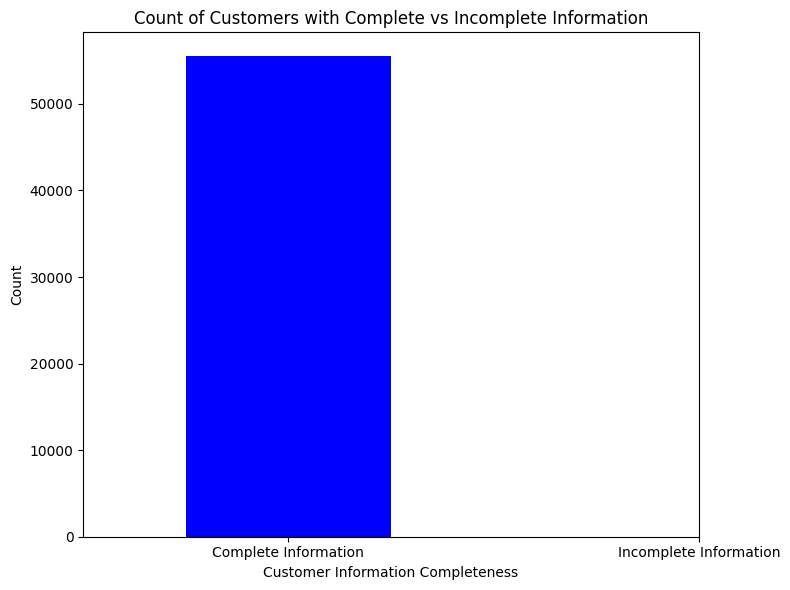

1    55491
Name: complete_customer_info, dtype: int64


In [19]:
#create chart
fig, ax = plt.subplots(figsize=(8, 6))
complete_info_counts_final.plot(kind='bar', ax=ax, color=['blue', 'orange'])
ax.set_title('Count of Customers with Complete vs Incomplete Information')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Complete Information', 'Incomplete Information'], rotation=0)
ax.set_xlabel('Customer Information Completeness')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

print(complete_info_counts_final)

## Prepare Data - Continued

➡️ Assignment Tasks
- Create seasonal buckets for Winter, Sprint, Summer, Fall
- Create a chart to show revenue by season
- Create a chart to show revenue by year

In [27]:
df_cleaned = df_cleaned.copy()
df_cleaned['order_date'] = pd.to_datetime(df_cleaned['order_date'], errors='coerce')
def assign_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
df_valid_dates = df_cleaned.dropna(subset=['order_date'])
df_valid_dates['season'] = df_valid_dates['order_date'].apply(assign_season)

<ipython-input-27-c08495ff0d11>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid_dates['season'] = df_valid_dates['order_date'].apply(assign_season)


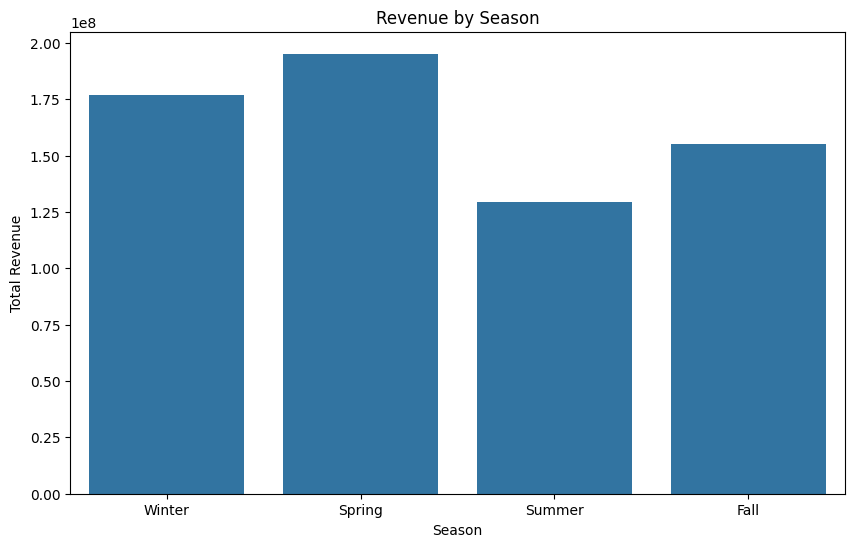

In [29]:
#revenue per season
seasonal_revenue = df_valid_dates.groupby('season')['total_amount'].sum().reset_index()

season_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_revenue['season'] = pd.Categorical(seasonal_revenue['season'], categories=season_order, ordered=True)
seasonal_revenue = seasonal_revenue.sort_values('season')

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='total_amount', data=seasonal_revenue)
plt.title('Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Total Revenue')
plt.show()

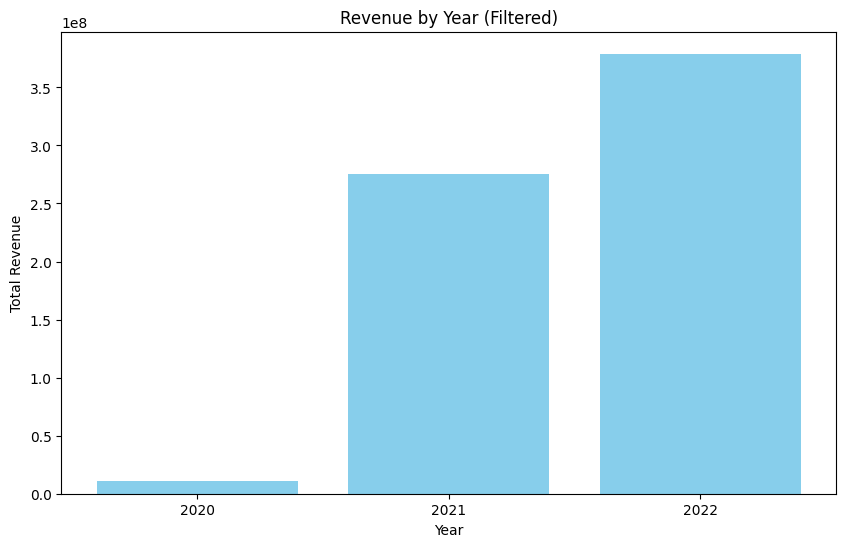

In [49]:
#revenue per year
valid_start_year = 2000
valid_end_year = 2023

df_filtered = df[(df['year'] >= valid_start_year) & (df['year'] <= valid_end_year)]
revenue_by_year_filtered = df_filtered.groupby('year')['total_amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(revenue_by_year_filtered['year'], revenue_by_year_filtered['total_amount'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Revenue by Year (Filtered)')
plt.xticks(revenue_by_year_filtered['year'])
plt.show()


## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable that will group product lines into "Outdoor" versus "Indoor" products.
- Create a plot to show the correlation between outdoor/indoor versus season  

In [50]:
#indoor/outdoor variable
outdoor_product_lines = ['Gardening', 'Sports Equipment', 'Outdoor Furniture']  # Just examples, adjust according to your data
indoor_product_lines = ['Electronics', 'Kitchenware', 'Furniture']  # Also examples

def categorize_product_line(product_line):
    if product_line in outdoor_product_lines:
        return 'Outdoor'
    elif product_line in indoor_product_lines:
        return 'Indoor'
    else:
        return 'Other'

df['product_category'] = df['product_line'].apply(categorize_product_line)

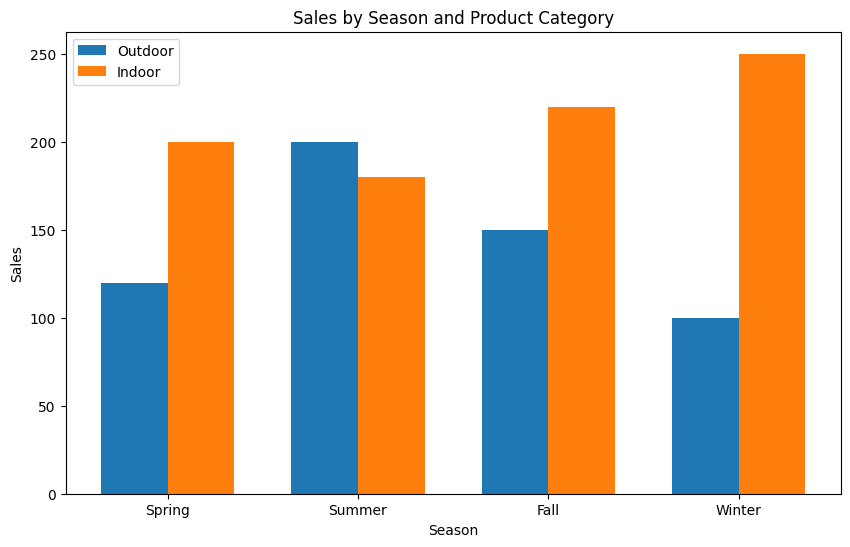

In [53]:
data = {
    'Season': ['Spring', 'Summer', 'Fall', 'Winter'],
    'Outdoor': [120, 200, 150, 100],
    'Indoor': [200, 180, 220, 250]
}
df_aggregated = pd.DataFrame(data)

positions = np.arange(len(df_aggregated['Season']))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(positions - width/2, df_aggregated['Outdoor'], width, label='Outdoor')
bars2 = ax.bar(positions + width/2, df_aggregated['Indoor'], width, label='Indoor')

ax.set_xlabel('Season')
ax.set_ylabel('Sales')
ax.set_title('Sales by Season and Product Category')
ax.set_xticks(positions)
ax.set_xticklabels(df_aggregated['Season'])
ax.legend()

plt.show()
